DATA SCIENCE LIFECYCLE EXAMS
THEME 2: HUMAN BEHAVIOUR - SENTIMENTAL ANALYSIS / NATURAL LANGUAGE PROCESSING OF HUMAN TEXT AND OPINIONS
NAME: EFPREM OKELLO
ACCESS NUMBER: B31324

STEP 1: IMPORT NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import wordcloud
import spacy

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



STEP 2: IMPORT DATA SETS
LINK TO DATA SET: https://archive.ics.uci.edu/dataset/331/sentiment+labelled+sentences

In [2]:
file_path = r"c:\Users\LENOVO\Desktop\DSA Masters\Data Science Lifecycle\Final Exams\sentiment labelled sentences\amazon_cells_labelled.txt"

df = pd.read_csv(file_path, delimiter = '\t', header = None, names = ['Text','Sentiment'])

print(df.head())

                                                Text  Sentiment
0  So there is no way for me to plug it in here i...          0
1                        Good case, Excellent value.          1
2                             Great for the jawbone.          1
3  Tied to charger for conversations lasting more...          0
4                                  The mic is great.          1


STEP 3: DATA PREPROCESSING

In [ ]:
import re
from gensim.parsing.preprocessing import remove_stopwords

# Define the preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and extra spaces
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    
    # Remove stopwords using Gensim's remove_stopwords function
    text = remove_stopwords(text)
    
    # Remove words with fewer than 3 letters
    words = text.split()  # Split text into words
    words = [word for word in words if len(word) >= 3]  # Keep words with 3 or more letters
    text = " ".join(words)  # Join words back into a single string
    
    return text

# Apply the preprocessing function to the 'Text' column
df['cleaned'] = df['Text'].apply(preprocess_text)
print(df)

STEP 4: EXPLORATORY DATA ANALYSIS

In [ ]:
# a) Text Frequency Distribution
word_freq = pd.Series(" ".join(df['cleaned']).split()).value_counts()
print(word_freq[:10])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14148\1020255044.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Sentiment'], palette="viridis")


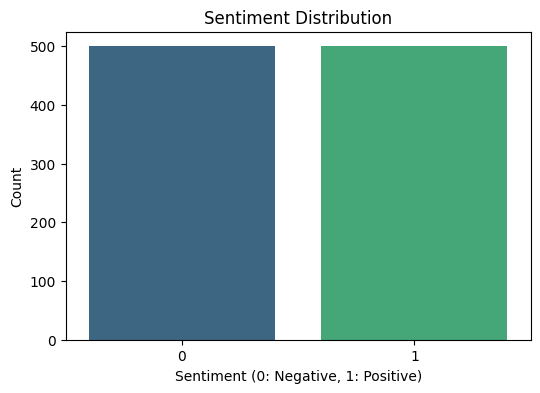

In [22]:
# b) Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Sentiment'], palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment (0: Negative, 1: Positive)")
plt.ylabel("Count")
plt.show()

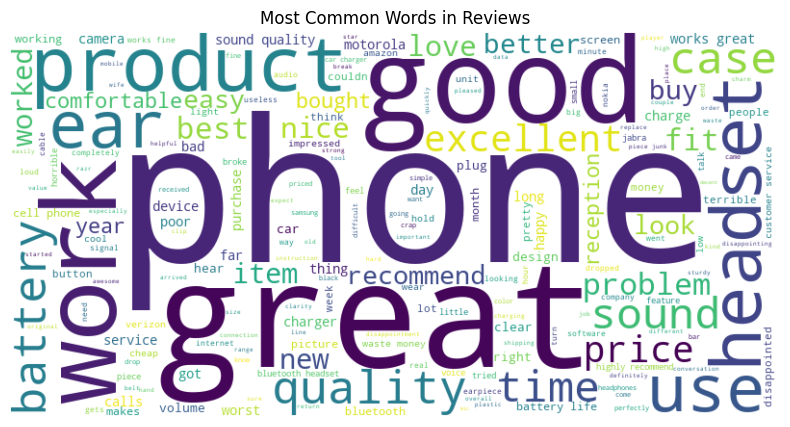

In [24]:
# c) Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['cleaned']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()

STEP 5: BUILD, EVALUATE, AND OPTIMIZE MODELS

Accuracy Score: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79        93
           1       0.80      0.86      0.83       107

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



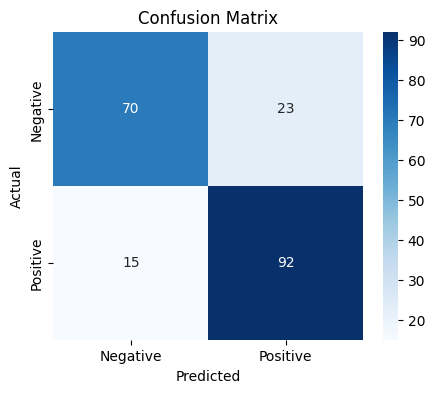

Hypothetical Predictions: [1 0]


In [30]:
# a) Supervised Model (Naïve Bayes)
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df['cleaned'])
y = df['Sentiment']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# b) Validate Model with Hypothetical Data
test_samples = ["The product is excellent and works perfectly!", "Terrible experience, waste of money."]
test_samples_cleaned = [preprocess_text(text) for text in test_samples]
test_vectorized = vectorizer.transform(test_samples_cleaned)

predictions = model.predict(test_vectorized)
print("Hypothetical Predictions:", predictions)  # 1 = Positive, 0 = Negative



In [32]:
# c) Unsupervised Model (K-Means Clustering)
# Import necessary libraries
from sklearn.cluster import KMeans

# c) Unsupervised Model (K-Means Clustering)
num_clusters = 2  # Assuming 2 sentiment groups
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

df['Cluster'] = clusters
print(df[['Text', 'Cluster']].head(10))


                                                Text  Cluster
0  So there is no way for me to plug it in here i...        0
1                        Good case, Excellent value.        0
2                             Great for the jawbone.        0
3  Tied to charger for conversations lasting more...        0
4                                  The mic is great.        0
5  I have to jiggle the plug to get it to line up...        0
6  If you have several dozen or several hundred c...        0
7        If you are Razr owner...you must have this!        0
8                Needless to say, I wasted my money.        0
9                   What a waste of money and time!.        0
